## Importando as bibliotecas necessária

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Carregando os dados históricos de preços da AAPL

In [4]:
df = pd.read_csv('data/AAPL.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,0.256429,0.266429,0.256250,0.264286,0.224939,181428800
2003-01-03,0.264286,0.266607,0.260536,0.266071,0.226458,147453600
2003-01-06,0.268393,0.274643,0.265714,0.266071,0.226458,390532800
2003-01-07,0.264107,0.267857,0.258393,0.265179,0.225699,342344800
2003-01-08,0.260357,0.262679,0.257857,0.259821,0.221138,229644800


## Criando uma coluna de preços de fechamento deslocados um dia para frente

In [5]:
df['Close_Shifted'] = df['Close'].shift(-1)
df.fillna(0, inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Shifted
Date,,,,,,,
2003-01-02,0.256429,0.266429,0.256250,0.264286,0.224939,181428800,0.266071
2003-01-03,0.264286,0.266607,0.260536,0.266071,0.226458,147453600,0.266071
2003-01-06,0.268393,0.274643,0.265714,0.266071,0.226458,390532800,0.265179
2003-01-07,0.264107,0.267857,0.258393,0.265179,0.225699,342344800,0.259821
2003-01-08,0.260357,0.262679,0.257857,0.259821,0.221138,229644800,0.262143


## Separando os dados em conjunto de treinamento e teste

In [6]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

## Modelo de Regressão Linear

### Criando as variáveis de entrada e saída

In [7]:
X_train, y_train = train_data[['Close']], train_data['Close_Shifted']
X_test, y_test = test_data[['Close']], test_data['Close_Shifted']

### Treinando o modelo de regressão linear

In [8]:
reg_model = LinearRegression().fit(X_train, y_train)

### Fazendo previsões no conjunto de teste

In [9]:
y_pred = reg_model.predict(X_test)

### Avaliando as métricas de desempenho do modelo

In [10]:
print('Métricas do Modelo de Regressão Linear:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

Métricas do Modelo de Regressão Linear:
MAE: 1.9320762133592926
MSE: 31.33040333355253
R²: 0.9811016981730226


## Modelo de Séries Temporais (ARIMA)

### Criando as variáveis de entrada e saída

In [31]:
train_ts = train_data['Close']
test_ts = test_data['Close']

### Treinando o modelo ARIMA

In [32]:
arima_model = ARIMA(train_ts, order=(1, 0, 0)).fit()

/Users/carlospo/opt/anaconda3/envs/chatbot-tensorflow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carlospo/opt/anaconda3/envs/chatbot-tensorflow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carlospo/opt/anaconda3/envs/chatbot-tensorflow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carlospo/opt/anaconda3/envs/chatbot-tensorflow/lib/python3.6

### Fazendo previsões no conjunto de teste

In [33]:
ts_pred = arima_model.forecast(len(test_ts))

/Users/carlospo/opt/anaconda3/envs/chatbot-tensorflow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### Avaliando as métricas de desempenho do modelo

In [34]:
print('\nMétricas do Modelo de Séries Temporais (ARIMA):')
print('MAE:', mean_absolute_error(test_ts, ts_pred))
print('MSE:', mean_squared_error(test_ts, ts_pred))
print('R²:', r2_score(test_ts, ts_pred))


Métricas do Modelo de Séries Temporais (ARIMA):
MAE: 71.28566517163931
MSE: 6798.338154870248
R²: -3.122203322270132


## Criando um novo DataFrame com as previsões dos modelos

In [44]:
df_predict = pd.DataFrame(
    dict(
        real=test_data['Close'],
        regression=y_pred,
        arima=ts_pred.to_numpy()
    )
)
df_predict.head()

,real,regression,arima
Date,,,
2019-03-25,47.185001,47.201840,47.758720
2019-03-26,46.697498,46.714255,47.754939
2019-03-27,47.117500,47.134328,47.751158
2019-03-28,47.180000,47.196838,47.747378
2019-03-29,47.487499,47.504389,47.743599


## Gerando o gráfico com Seaborn

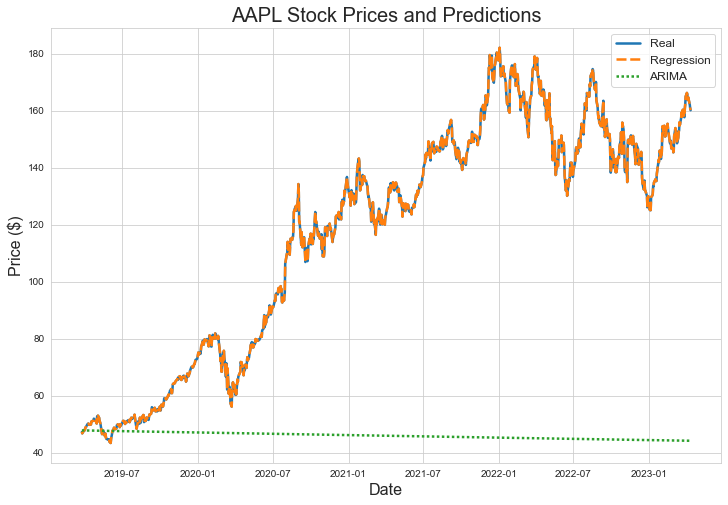

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_predict, linewidth=2.5)
plt.title('AAPL Stock Prices and Predictions', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.legend(['Real', 'Regression', 'ARIMA'], fontsize=12)
plt.show()